# Encontrando y Arreglando Errores

Todos cometemos errores. Hasta los programadores profesionales. El IDLE es bueno atrapando errores de sintaxis y de ejecucion, pero hay un tercer tipo de errores: lógicos. Los errores lógicos ocurren cuando un programa válido no hace lo esperado del mismo.

Errores logicos causan comportamiento inesperado al cual llamamos **bugs**. La traduccion literal no es favorable: *insectos*, por lo que preferimos llamarlos simplemente **comportamiento no intencionado**. La remoción de estos errores se llama **depuración**, y un **depurador** es una herramienta que nos ayuda a cazar errores y entender porque estan ocurriendo.

Aprendiendo a encontrar y resolver errores es una habilidad muy preciada y de gran utilidad.

En esta sección vamos a:
* Aprender usar la ventana del Depurador de IDLE
* Depurar una función con errores

## Utilizando el Depurador IDLE

La interfaz principal del depurador IDLE es a travez de la ventana de control del depurador, llamada **Debug Control Window**. De ahora en adelante esta ventana la llamaremos el Depurador. 

Abramos el Depurador seleccionando **`Debug > Debugger`** desde el menu de la ventana interactiva. 

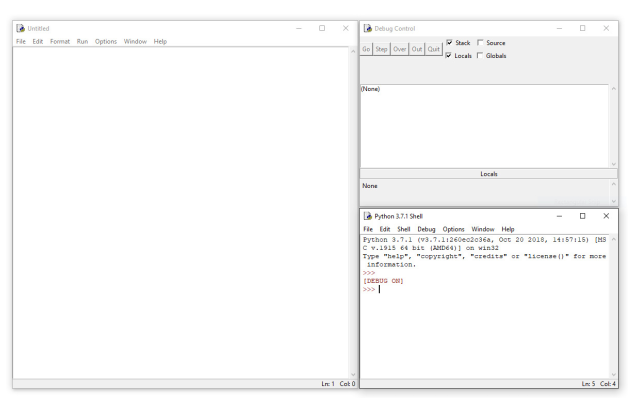

Cuando el Depurador esta abierto, podemos ver que el prompt `>>>` dice `[DEBUG ON]`, indicando que el depurador esta abierto.

En esta seccion vamos a aprender como el Depurador es organizado y como navegamos a traves del codigo, linea por linea, y como crear puntos de interrupción para acelerar el proceso de depuracion.

## La ventana del Depurador: Vision General

Para que podamos ver como funciona el depurador, vamos a empezar escribiendo un programa simple sin ningun error

In [1]:
for i in range(1, 4):
    j = i * 2
    print(f"i es {i} y j es {j}")

i es 1 y j es 2
i es 2 y j es 4
i es 3 y j es 6


Cuando guardamos y ejecutamos este script con el Depurador, observamos que la ejecución no llega muy lejos. La ventana de control del Depurador se verá algo así:

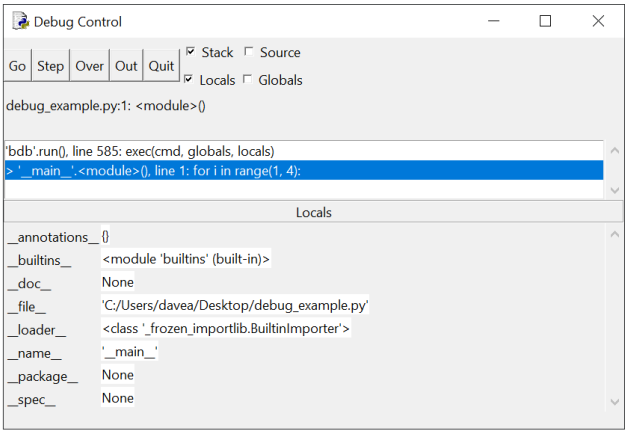

El panel contiene la siguiente linea en azul: `> '__main__'.<module>(), line 1: for i in range(1, 4):`

El tablero `stack` nos indica que la linea 1, esta por ejecutarse pero no se ha ejecutado todavia. La parte `'__main__'.module()` nos indica que estamos en la parte principal del script y no adentro de en una funcion.

Abajo del tablero `stack`, esta el tablero de `Locals`, que muestra una lista de algunos terminos extraños como `__annotations__`, `__builtins__`, `__doc__`, entre otros. Estos son unos valores internos que por el momento los podemos ignorar. Mientras el programa se ejecuta, vamos a ver variables declaradas en el codigo mostradas en esta ventana para que puedas darle seguimiento a su valor.

Existen cinco (5) botonos ubicados en la parte superior izquierda del Depurador:
* Go
* Step
* Over
* Out
* Quit

### Step

Si presionamos el boton *Step* en la esquina superior izquierda del Depurador, la ventana cambia un poco de apariencia, asi:

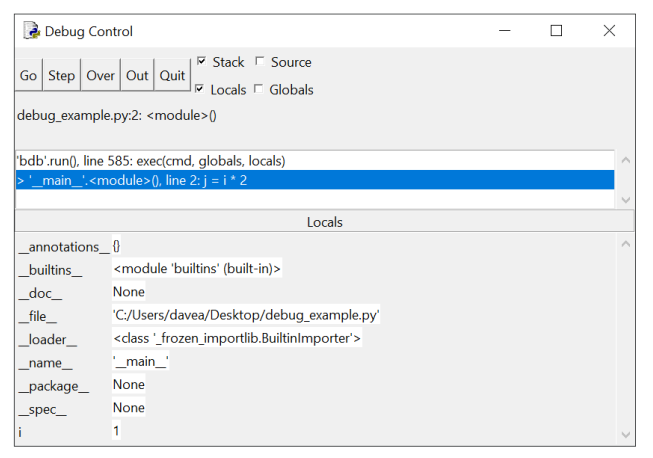

Hay dos diferencias que hay que prestarle atencion aqui. Primero, el mensaje en la ventana Stack cambia a:
```
> '__main__'.<module>(), line 2: j = i * 2:
```

En este punto, la linea 1 del codigo se ejecuto y el depurador se detuvo justo antes de ejecutar la linea 2.

El segundo cambio es la nueva variable `i` que es asignada al valor `1` en el tablero de `Locals`. Eso es porque el `for` loop en la primera linea de codiga cambia la variable `i` y se la asigna el valor `1`. 

Ahora presionemos el botom `Step` para navegar por el codigo linea por linea, observando que ocurre en el depurador. Cuando llegamos a la linea `print()`, podemos ver que el dato de salida es mostrado en la ventana interactiva una pieza a la vez.

Asimismo, podemos darle seguimiento a los valores de `i` y `j` mientras navegamos por el `for` loop. Esto es muy util cuando estamos tratando de ubicar errores en programas. Saber que valor tiene una variable en cada linea de codigo nos permite identificar donde hay algo incorrecto o no deseado.

### Puntos de interrupcion y el boton "Go"

En ocasiones sabemos que el error debe estar en una seccion en particular, pero no sabemos el lugar exacto. En vez que estar presionando **Step** todo el dia, podemos crear un punto de interrupcion que le indica al depurador que ejecute todo el codigo antes del punto de interrupcion hasta el punto de interrupcion. La interrupcion se produce en el depurador para la ejecucion llega a una pausa a fin de poder verificar el estado actual del programa. 

Para establecer un punto de interrupcion, habra que presionar el boton de la derecha del mouse en la linea de codigo en el script y seleccionar "Set Breakpoint". IDLE resalta esa linea en amarillo para indicar que el punto de interrupcion ha sido configurado. Podemos eliminar el punto en cualquier momento presionando en boton de la derecha del mouse an la linea que tiene el punto y seleccionando *Clear Breakpoint*.

Presiona el boton *Quit* en la parte superior del Depurador para apagarlo. Esto no cierra la ventana porque lo vamos a utilizar nuevamente en un momento.

Vamos a crear un breakpoint en la linea de codigo con el `print()`.

Ahora ejecutemos el script presionando *F5*. Justo como antes, el tablero *Stack* del Depurador indica que el depurador ha iniciado y esta a la espera de la ejecucion de la linea 1. Esta vez, en vez de presionar el boton *Step*, presionemos el boton *Go*.

El tablero *Stack* ahora nos indica que estamos a la espera de la ejecucion de la linea 3.

Si miramos al table *Locals*, veremos que ambas variables `i` y `j` tienen los valores `1` y `2` respectivamente.

Presionando el boton *Go*, le indicamos al depurador que ejecute el codigo de manera continua hasta llegar al final del programa o an punto de interrupcion. Ahora presionemos *Go*. 

El mismo mensaje de antes es mostrado en el tablero *Stack*, indicando que el depurador esta a la espera de ejecutar la linea 3, sin embargo los valores de las variables `i` y `j` son `2` y `4`. La ventana interactiva tambien muestra el dato de salida obtenido por la ejecucion de la linea con `print()` por primera vez.

Cada vez que presionamos *Go*, el depurador ejecuta el codigo de manera continua hasta que el programa llegue al proximo punto de interrupcion. Como ya configuramos el punto de interrupcion en la linea 3, adentro del `for` loop, el depurador se detiene en esta linea cada vez que paga por el loop.

Si presionamos *Go* una tercera vez, ahora `i` y `j` tienen los valores `3` y `6`. Que creemos que pasaría si presionaramos *Go* otra vez? Ya que el `for` loop solo cicla 3 veces, cuando presionamos Go esta vez, el programa termina de ejecutarse.

## "Over" y "Out"

El boton *Over* funciona como una combinacion de *Step* y *Go*. Navega o pasa sobre una funcion o ciclo. En otras palabras, si estamos por utilizar *Step* en una funcion con el depurador, todavia podemos ejecutar el codigo de la funcion sin la necesidad de utilizar *Step* en cada linea del programa. El botno *Over* nos lleva directamente al resultado de ejecutar esa funcion.

Asimismo, si ya estamos adentro de una cuncion o ciclo, el boton *Out* ejecuta el codigo restante de una funcion o ciclo y luego ocasiona una pausa.

## Arregluemos alguno errores

Ahora que hemos utilizado el depurado, veamos un programa que presenta errores.

El siguiente codigo define una funcion `agrega_guion_bajos()` que toma como parametro un objeto string llamado `palabra` y retorna el nuevo string conteniendo una copia `ord` con cada caracter rodeado por guin bajos. Por ejemplo, `agrega_guion_bajos('python')` deberia retornar "_p_y_t_h_o_n_".

In [ ]:
def agrega_guion_bajos(palabra):
    new_word = "_"
    for i in range(0, len(word)):